<a href="https://colab.research.google.com/github/Pawan300/Breast-Cancer-prediction/blob/master/BIo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
% matplotlib inline

In [0]:
try:
  data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/breast-cancer-wisconsin.data",header=None)
except Exception as e:
  print(e)

In [0]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
data.shape

(699, 11)

In [0]:
for i in range(0,11):
  data[i]=data[i].replace('?',np.NaN)

In [0]:
data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

In [0]:
data[6].fillna('0',inplace=True)

(array([402., 132.,  30.,  19.,  28.,   9.,   8.,  16.,  30.,  25.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

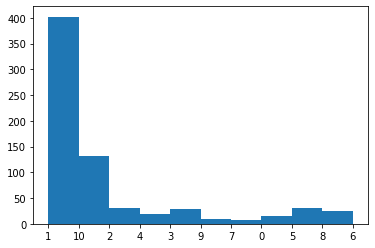

In [0]:
plt.hist(data[6])

In [0]:
def datatype(data):
  for i in range(0,11):
    print(type(data[i][0]),"  ",i)

In [0]:
datatype(data)

<class 'numpy.int64'>    0
<class 'numpy.int64'>    1
<class 'numpy.int64'>    2
<class 'numpy.int64'>    3
<class 'numpy.int64'>    4
<class 'numpy.int64'>    5
<class 'str'>    6
<class 'numpy.int64'>    7
<class 'numpy.int64'>    8
<class 'numpy.int64'>    9
<class 'numpy.int64'>    10


In [0]:
data[6]=data[6].astype('int')
datatype(data)

<class 'numpy.int64'>    0
<class 'numpy.int64'>    1
<class 'numpy.int64'>    2
<class 'numpy.int64'>    3
<class 'numpy.int64'>    4
<class 'numpy.int64'>    5
<class 'numpy.int64'>    6
<class 'numpy.int64'>    7
<class 'numpy.int64'>    8
<class 'numpy.int64'>    9
<class 'numpy.int64'>    10


In [0]:
data=data.drop(0,axis=1)

2    458
4    241
Name: 10, dtype: int64


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Labels')]

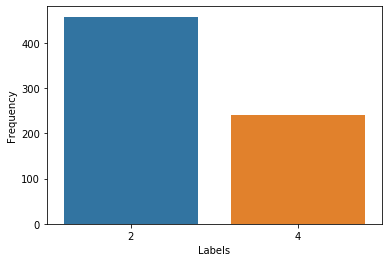

In [0]:
print(data[10].value_counts())
a=sns.countplot(data[10])
a.set(xlabel='Labels',ylabel='Frequency')

In [0]:
values={2:0,4:1}
data[10]=data[10].map(values)

In [0]:
labels=data[10].copy()
data=data.drop(10,axis=1)

In [0]:
data.head()

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [0]:
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
print('Original dataset shape {}'.format(Counter(labels)))
sm=SMOTE()
X,y=sm.fit_sample(data,labels)
print('Now dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 458, 1: 241})
Now dataset shape Counter({0: 458, 1: 458})


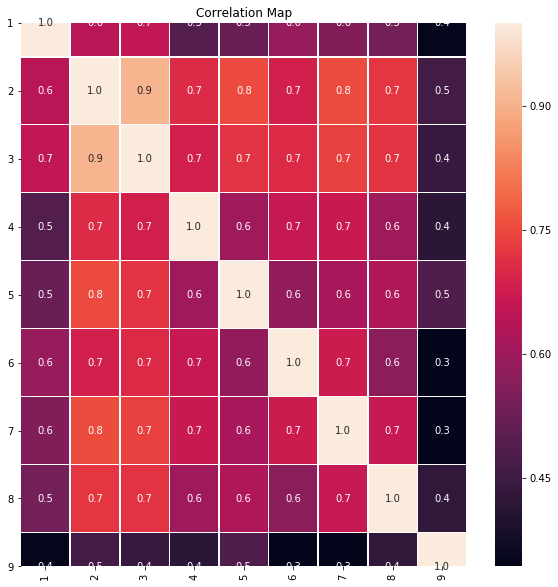

In [0]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [0]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [0]:
print(Xtest.shape)
print(Xtrain.shape)
print(Ytest.shape)
print(Ytrain.shape)

(184, 9)
(732, 9)
(184,)
(732,)


### Model

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score,roc_curve ,auc,accuracy_score,confusion_matrix,precision_score,recall_score

In [0]:
def plot_c_matrix(mat):
  class_names = [0,1]
  fontsize=14
  df_conf_matrix = pd.DataFrame(mat, index=class_names, columns=class_names)
  fig = plt.figure()
  heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  heatmap.set(xlabel='Predicted label' , ylabel='True label')
  
def plot_roc(roc_auc):
    #plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
  

## Linear Kernel

In [0]:
svc_linear=SVC(kernel="linear",class_weight="balanced",verbose=True)
svc_linear.fit(Xtrain,Ytrain)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [0]:
y_predict=svc_linear.predict(Xtest)
print("F1_score: ",f1_score(Ytest,y_predict))
print("Precision:",precision_score(Ytest, y_predict))
print("Recall:",recall_score(Ytest, y_predict))
print(confusion_matrix(Ytest, y_predict, labels=None, sample_weight=None))

F1_score:  0.9613259668508287
Precision: 0.9775280898876404
Recall: 0.9456521739130435
[[90  2]
 [ 5 87]]


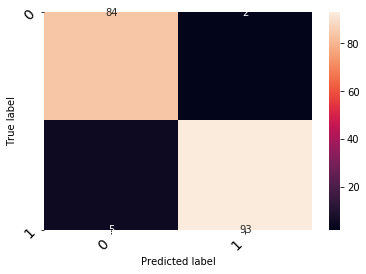

In [0]:
plot_c_matrix(confusion_matrix(Ytest, y_predict, labels=None, sample_weight=None))

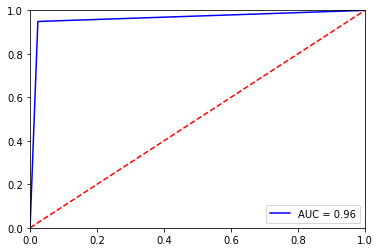

In [0]:
fpr,tpr,threshold=roc_curve(Ytest,y_predict)
plot_roc(auc(fpr,tpr))

## Sigmoid Kernel

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [0]:
X_train_std=scaler.fit_transform(Xtrain)
X_test_std=scaler.fit_transform(Xtest)

In [0]:
svc_sigmoid=SVC(kernel="sigmoid",class_weight="balanced",verbose=True)
svc_sigmoid.fit(X_train_std,Ytrain)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [0]:
y_predict_sigmoid = svc_sigmoid.predict(X_test_std)
print("f1_score : ",f1_score(Ytest,y_predict_sigmoid))
print("Precision:",precision_score(Ytest, y_predict_sigmoid))
print("Recall:",recall_score(Ytest, y_predict_sigmoid))
print(confusion_matrix(Ytest, y_predict_sigmoid, labels=None, sample_weight=None))

f1_score :  0.945054945054945
Precision: 0.9555555555555556
Recall: 0.9347826086956522
[[88  4]
 [ 6 86]]


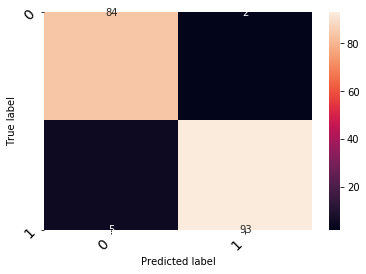

In [0]:
plot_c_matrix(confusion_matrix(Ytest, y_predict_sigmoid, labels=None, sample_weight=None))

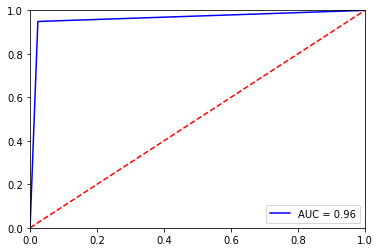

In [0]:
fpr,tpr,threshold=roc_curve(Ytest,y_predict_sigmoid)
plot_roc(auc(fpr,tpr))

## Gaussian RBF kernel

In [0]:
svclassifier_rbf = SVC(kernel='rbf' , class_weight = 'balanced' ,verbose = True)  
svclassifier_rbf.fit(X_train_std, Ytrain)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [0]:
y_predict_rbf = svclassifier_rbf.predict(X_test_std)
print("f1_score : ",f1_score(Ytest,y_predict_rbf))
print("Precision:",precision_score(Ytest, y_predict_rbf))
print("Recall:",recall_score(Ytest, y_predict_rbf))
print(confusion_matrix(Ytest, y_predict_rbf, labels=None, sample_weight=None))

f1_score :  0.9565217391304348
Precision: 0.9565217391304348
Recall: 0.9565217391304348
[[88  4]
 [ 4 88]]


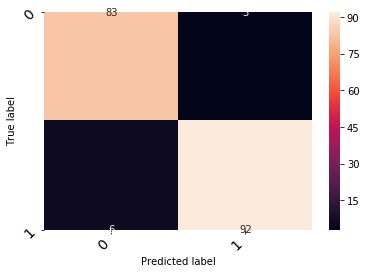

In [0]:
plot_c_matrix(confusion_matrix(Ytest, y_predict_rbf, labels=None, sample_weight=None))

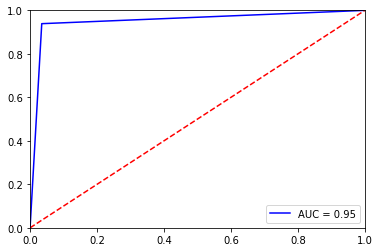

In [0]:
fpr,tpr,threshold=roc_curve(Ytest,y_predict_rbf)
plot_roc(auc(fpr,tpr))

# Poly kernel

In [0]:
svclassifier_poly = SVC(kernel='poly',verbose = True)  
svclassifier_poly.fit(X_train_std, Ytrain)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [0]:
y_predict_poly = svclassifier_poly.predict(X_test_std)
print("f1_score : ",f1_score(Ytest,y_predict_poly))
print("Precision:",precision_score(Ytest, y_predict_poly))
print("Recall:",recall_score(Ytest, y_predict_poly))
print(confusion_matrix(Ytest, y_predict_poly, labels=None, sample_weight=None))

f1_score :  0.972972972972973
Precision: 0.967741935483871
Recall: 0.9782608695652174
[[89  3]
 [ 2 90]]


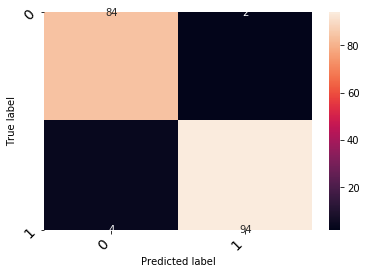

In [0]:
plot_c_matrix(confusion_matrix(Ytest, y_predict_poly, labels=None, sample_weight=None))

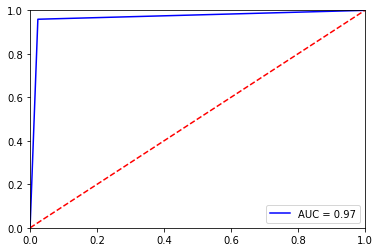

In [0]:
fpr,tpr,threshold=roc_curve(Ytest,y_predict_poly)
plot_roc(auc(fpr,tpr))

## Result

In [0]:
Linear Kernel: 0.961
Sigmoid Kernel: 0.945
Gaussian RBF kernel: 0.956
Poly Kernel: 0.972